In [22]:
import numpy as np
import matplotlib.pyplot as plt

import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.sequence.phylo as phylo

import biotite.database.entrez as entrez
import biotite.database.uniprot as uniprot
import biotite.sequence.io.fasta as fasta
import biotite.sequence.io.genbank as gb

import biotite.application.clustalo as clustalo
import biotite.application.mafft as mafft
import biotite.application.muscle as muscle

# Generate sequence from different resources (NCBI/Uniprot)

In [23]:
uids = entrez.search(
    entrez.SimpleQuery("HCN1","Gene Name") &
    entrez.SimpleQuery("homo sapiens","Organism"),
    db_name="protein"
)

# UIDS a list of UniProt IDs for the HCN1 gene in Homo sapiens
print(f"uids:{uids}")

# We only pick up uids[0]
fasta_file = fasta.FastaFile.read(
    entrez.fetch_single_file(uids[0],None,"protein","fasta")
)

print(f"fasta_file:{fasta_file}")

# why use next(iter(fasta_file.values()))?
# This extracts the first (and only) sequence from the FastaFile object, 
# which is a dictionary-like structure where values are the sequences.
seq1 = seq.ProteinSequence(next(iter(fasta_file.values())))

print(f"seq1:{seq1}")


uids:['229462966', '116325989', '119576482', '119576481', '28629106']
fasta_file:>CAA42669.1 beta-2-glycoprotein I, partial [Bos taurus]
PALVLLLGFLCHVAIAGRTCPKPDELPFSTVVPLKRTYEPGEQIVFSCQPGYVSRGGIRRFTCPLTGLWP
INTLKCMPRVCPFAGILENGTVRYTTFEYPNTISFSCHTGFYLKGASSAKCTEEGKWSPDLPVCAPITCP
PPPIPKFASLSVYKPLAGNNSFYGSKAVFKCLPHHAMFGNDTVTCTEHGNWTQLPECREVRCPFPSRPDN
GFVNHPANPVLYYKDTATFGCHETYSLDGPEEVECSKFGNWSAQPSCKASCKLSIKRATVIYEGERVAIQ
NKFKNGMLHGQKVSFFCKHKEKKCSYTEDAQCIDGTIEIPKCFKEHSSLAFWKTDASDVKPC
>CAA42669.1 beta-2-glycoprotein I, partial [Bos taurus]
PALVLLLGFLCHVAIAGRTCPKPDELPFSTVVPLKRTYEPGEQIVFSCQPGYVSRGGIRRFTCPLTGLWP
INTLKCMPRVCPFAGILENGTVRYTTFEYPNTISFSCHTGFYLKGASSAKCTEEGKWSPDLPVCAPITCP
PPPIPKFASLSVYKPLAGNNSFYGSKAVFKCLPHHAMFGNDTVTCTEHGNWTQLPECREVRCPFPSRPDN
GFVNHPANPVLYYKDTATFGCHETYSLDGPEEVECSKFGNWSAQPSCKASCKLSIKRATVIYEGERVAIQ
NKFKNGMLHGQKVSFFCKHKEKKCSYTEDAQCIDGTIEIPKCFKEHSSLAFWKTDASDVKPC
>CAA42669.1 beta-2-glycoprotein I, partial [Bos taurus]
PALVLLLGFLCHVAIAGRTCPKPDELPFSTVVPLKRTYEPGEQIVFSCQPGYVSRGG

In [24]:
query = (
    uniprot.SimpleQuery("reviewed","true") &
    uniprot.SimpleQuery("gene_exact","HCN1") &
    uniprot.SimpleQuery("organism_id","9606")
)
ids = uniprot.search(query)
print(f"ids:{ids}")

seqs = []
for f in uniprot.fetch(ids,"fasta"):
    ff = fasta.FastaFile.read(f)
    seqs.append(seq.ProteinSequence(next(iter(ff.values()))))

print(f"seqs:{seqs}")

ids:['O60741']
seqs:[ProteinSequence("MEGGGKPNSSSNSRDDGNSVFPAKASATGAGPAAAEKRLGTPPGGGGAGAKEHGNSVCFKVDGGGGGGGGGGGGEEPAGGFEDAEGPRRQYGFMQRQFTSMLQPGVNKFSLRMFGSQKAVEKEQERVKTAGFWIIHPYSDFRFYWDLIMLIMMVGNLVIIPVGITFFTEQTTTPWIIFNVASDTVFLLDLIMNFRTGTVNEDSSEIILDPKVIKMNYLKSWFVVDFISSIPVDYIFLIVEKGMDSEVYKTARALRIVRFTKILSLLRLLRLSRLIRYIHQWEEIFHMTYDLASAVVRIFNLIGMMLLLCHWDGCLQFLVPLLQDFPPDCWVSLNEMVNDSWGKQYSYALFKAMSHMLCIGYGAQAPVSMSDLWITMLSMIVGATCYAMFVGHATALIQSLDSSRRQYQEKYKQVEQYMSFHKLPADMRQKIHDYYEHRYQGKIFDEENILNELNDPLREEIVNFNCRKLVATMPLFANADPNFVTAMLSKLRFEVFQPGDYIIREGAVGKKMYFIQHGVAGVITKSSKEMKLTDGSYFGEICLLTKGRRTASVRADTYCRLYSLSVDNFNEVLEEYPMMRRAFETVAIDRLDRIGKKNSILLQKFQKDLNTGVFNNQENEILKQIVKHDREMVQAIAPINYPQMTTLNSTSSTTTPTSRMRTQSPPVYTATSLSHSNLHSPSPSTQTPQPSAILSPCSYTTAVCSPPVQSPLAARTFHYASPTASQLSLMQQQPQQQVQQSQPPQTQPQQPSPQPQTPGSSTPKNEVHKSTQALHNTNLTREVRPLSASQPSLPHEVSTLISRPHPTVGESLASIPQPVTAVPGTGLQAGGRSTVPQRVTLFRQMSSGAIPPNRGVPPAPPPPAAALPRESSSVLNTDPDAEKPRFASNL")]


# Alignment

In [25]:

seq1 = seq.ProteinSequence("RFDCVHYFD")
seq2 = seq.ProteinSequence("RFDCVHKGFD")

matrix = align.SubstitutionMatrix.std_protein_matrix()

ali = align.align_optimal(
    seq1, seq2,
    matrix,
    gap_penalty=(-10, -1),
    terminal_penalty=False
)[0]

print(ali)


RFDCVHY-FD
RFDCVHKGFD


In [26]:
import biotite.application.clustalo as clustalo

seq3 = seq.ProteinSequence("RFDCVHYFD")
seq4 = seq.ProteinSequence("RFDCVHKGFD")

app = clustalo.ClustalOmegaApp([seq1, seq2, seq3, seq4])
app.start()
app.join()
alignment = app.get_alignment()
print(alignment)

FileNotFoundError: [Errno 2] No such file or directory: 'clustalo'

In [ ]:
seqs = [seq1, seq2, seq3, seq4]
alignment = mafft.MafftApp.align(seqs)

print(alignment)

RFDCVHY-FD
RFDCVHKGFD
RFDCVHY-FD
RFDCVHKGFD


In [ ]:
app = muscle.MuscleApp(seqs)
app.start(); app.join()
alignment = app.get_alignment()

print(alignment)

FileNotFoundError: [Errno 2] No such file or directory: 'muscle'

In [27]:
trace = alignment.trace# shape: (n_columns, n_seqs)
codes = align.get_codes(alignment)# same shape, gaps = -1

print(trace)
print(codes)

[[ 0  0  0  0]
 [ 1  1  1  1]
 [ 2  2  2  2]
 [ 3  3  3  3]
 [ 4  4  4  4]
 [ 5  5  5  5]
 [ 6  6  6  6]
 [-1  7 -1  7]
 [ 7  8  7  8]
 [ 8  9  8  9]]
[[14  4  2  1 17  6 19 -1  4  2]
 [14  4  2  1 17  6  8  5  4  2]
 [14  4  2  1 17  6 19 -1  4  2]
 [14  4  2  1 17  6  8  5  4  2]]


In [28]:
# pairwise sequence identity matrix

distances = 1 - align.get_pairwise_sequence_identity(
    alignment, mode="shortest"
)

print(distances)


[[0.         0.11111111 0.         0.11111111]
 [0.11111111 0.         0.11111111 0.        ]
 [0.         0.11111111 0.         0.11111111]
 [0.11111111 0.         0.11111111 0.        ]]


https://www.biotite-python.org/latest/apidoc/biotite.sequence.align.score.html#biotite.sequence.align.score

Calculate the similarity score of an alignment.

In [32]:
matrix = align.SubstitutionMatrix.std_protein_matrix()

scores = np.zeros(len(seq1))

for i in range(len(alignment)):
    idx = alignment.trace[i,0]
    print(f"i:{i}, idx:{idx}")
    if idx != -1:
            scores[idx] = align.score(alignment[i:i+1], matrix)
            print(f"scores[{idx}] = {scores[idx]}")

print(scores)

i:0, idx:0
scores[0] = 30.0
i:1, idx:1
scores[1] = 36.0
i:2, idx:2
scores[2] = 36.0
i:3, idx:3
scores[3] = 54.0
i:4, idx:4
scores[4] = 24.0
i:5, idx:5
scores[5] = 48.0
i:6, idx:6
scores[6] = 4.0
i:7, idx:-1
i:8, idx:7
scores[7] = 36.0
i:9, idx:8
scores[8] = 36.0
[30. 36. 36. 54. 24. 48.  4. 36. 36.]


# Graphics

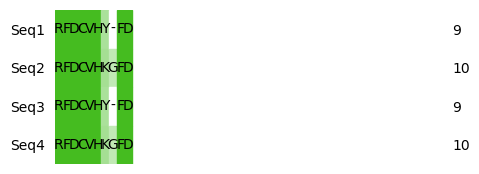

In [35]:
fig, ax = plt.subplots(figsize=(5,2))

seqs = [seq1, seq2, seq3, seq4]
alignment = mafft.MafftApp.align(seqs)
names = [f"Seq{i+1}" for i in range(len(seqs))]

matrix = align.SubstitutionMatrix.std_protein_matrix()

graphics.plot_alignment_similarity_based(
    ax,
    alignment,
    matrix=matrix,
    labels=names,
    show_numbers=True
)
plt.show()

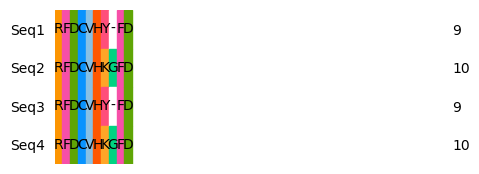

In [39]:
fig, ax = plt.subplots(figsize=(5,2))

seqs = [seq1, seq2, seq3, seq4]
alignment = mafft.MafftApp.align(seqs)
names = [f"Seq{i+1}" for i in range(len(seqs))]

matrix = align.SubstitutionMatrix.std_protein_matrix()

graphics.plot_alignment_type_based(
    ax,
    alignment,
    color_scheme="blossom",
    labels=names,
    show_numbers=True
)

plt.show()

In [55]:
import pandas as pd

# use pandas dictionary to create dataframe
data = {
    "Sequence": ["seq1", "seq1", "seq2", "seq2", "seq3", "seq3", "seq4", "seq4"],
    "Position": [1, 4, 1, 4, 1, 4, 1, 4],
    "Fluorescence_Score": [34, 12, 30, 5, 10, 40, 15, 35]
}

df = pd.DataFrame(data)

print(df)

  Sequence  Position  Fluorescence_Score
0     seq1         1                  34
1     seq1         4                  12
2     seq2         1                  30
3     seq2         4                   5
4     seq3         1                  10
5     seq3         4                  40
6     seq4         1                  15
7     seq4         4                  35


In [ ]:
seqs = [seq1, seq2, seq3, seq4]
alignment = mafft.MafftApp.align(seqs)
matrix = align.SubstitutionMatrix.std_protein_matrix()

# read fluorescence scores from the dataframe
scores = {}
for _, row in df.iterrows():
    key = (row["Sequence"], row["Position"])
    scores[key] = row["Fluorescence_Score"]
    
# create the fluorescence score array
n_columns = len(alignment)
n_seqs = len(seqs)
array = np.zeros((n_columns, n_seqs))

for j in range(n_seqs):
    for i in range(n_columns):
        seq_name = f"seq{j+1}"
        pos = alignment.trace[i,j] + 1  # +1 for 1-based position
        if alignment.trace[i,j] != -1:
            array[i,j] = scores.get((seq_name, pos), 0)
        else:
            array[i,j] = 0
names = [f"Seq{i+1}" for i in range(len(seqs))]

print(array)

[[34. 30. 10. 15.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [12.  5. 40. 35.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


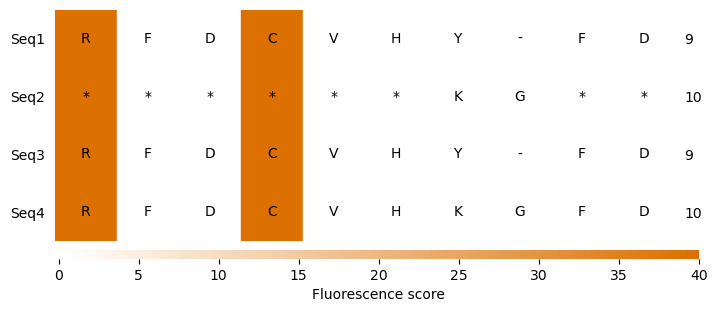

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3))

# 1) Plot alignment colored by your fluorescence array
graphics.plot_alignment_array(
    ax,
    alignment,
    fl_score=array,          # (n_columns, n_seqs)
    labels=names,
    show_numbers=True,
    symbols_per_line=10,
)

# 2) Build a colorbar that matches the plotter's colormap
ax_cb = fig.add_axes([0.13, 0.05, 0.8, 0.03])  # [left, bottom, width, height]
ax_cb.set_frame_on(False)

# Grab the same colormap Biotite uses for this array
cmap = graphics.ArrayPlotter(ax_cb, array).get_cmap()

# Use a sensible normalization (choose ONE)
norm = mpl.colors.Normalize(vmin=array.min(), vmax=array.max())
# norm = mpl.colors.PowerNorm(gamma=0.33, vmin=array.min(), vmax=array.max())  # like their example

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax_cb,
    orientation="horizontal",
    label="Fluorescence score",
)

plt.show()


RFDCVHKGFD


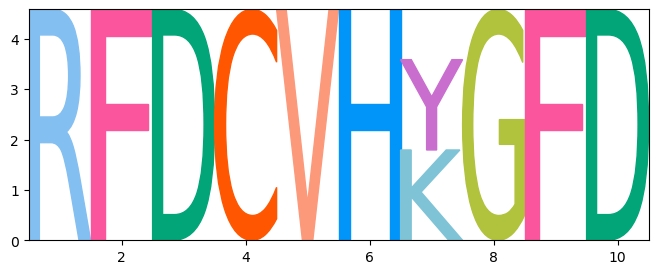

In [63]:
profile = seq.SequenceProfile.from_alignment(alignment)

print(profile.to_consensus())


fig, ax = plt.subplots(figsize=(8, 3))

graphics.plot_sequence_logo(
    ax, profile, scheme="flower"
)

plt.show()

In [70]:
# Taken from
# Kyte, J and Doolittle, RF.
# "A simple method for displaying
# the hydropathic character of a protein".
# Journal of Molecular Biology (2015). 157(1):105–32.
# doi:10.1016/0022-2836(82)90515-0
hydropathy_dict = {
    "I": 4.5,
    "V": 4.2,
    "L": 3.8,
    "F": 2.8,
    "C": 2.5,
    "M": 1.9,
    "A": 1.8,
    "G": -0.4,
    "T": -0.7,
    "S": -0.8,
    "W": -0.9,
    "Y": -1.3,
    "P": -1.6,
    "H": -3.2,
    "E": -3.5,
    "Q": -3.5,
    "D": -3.5,
    "N": -3.5,
    "K": -3.9,
    "R": -4.5,
}

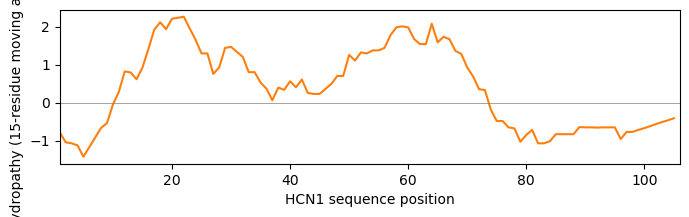

In [74]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2)) 

seq1 = seq.ProteinSequence(
    "MDSKGSSQKGSRLLLLLVVSNLLLCQGVVSTPVKAVVAAEERAGVPAASDLVLLGNLGFLGAFVGVLSAGINAASPNSSSNTSTSSSLNSSTSSSTSSSTSSSTS"
    )

seq_str = str(seq1)
hydropathy = np.array([hydropathy_dict[a] for a in seq_str])

def moving_average(x, w):
    return np.convolve(x, np.ones(w)/w, mode="same")

window = 15

hydropathy_smooth = moving_average(hydropathy, window)
x = np.arange(1, len(seq_str) + 1)

ax.plot(x, hydropathy_smooth, color="tab:orange")
ax.axhline(0, color="gray", linewidth=0.5)
ax.set_xlim(1, len(seq_str) + 1)
ax.set_xlabel("HCN1 sequence position")
ax.set_ylabel(f"Hydropathy ({window}-residue moving average)")

plt.show()
